# 1. **Installing & Importing Libraries**

In [1]:
# Data handling tools
import numpy as np                 # For mathematical calculations
import pandas as pd                # For data visualization

# Visualization tools
import seaborn as sns              #  For plotting graphs
import matplotlib.pyplot as plt 
import statsmodels.api as sm
%matplotlib inline
from matplotlib.cm import rainbow
import plotly.express as px


#!pip install termcolor
from termcolor import colored
import warnings                    # To ignore any warnings 
warnings.filterwarnings('ignore')
plt.style.use('Solarize_Light2')
# setup matplotlib
from scipy import stats
from itertools import cycle
pd.set_option('max_columns', 50)
plt.style.use('bmh')
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle = cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])
plt.style.use('ggplot')

# **2**) **Load the dataset**: Start by loading the dataset into environment.

In [2]:
df=pd.read_csv("/kaggle/input/sepsis/Paitients_Files_Train.csv")
df.head()
df['Sepssis'] = df['Sepssis'].map({'Positive': 1, 'Negative': 0})
df.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,1


In [3]:
df1=pd.read_csv("/kaggle/input/sepsis/Paitients_Files_Test.csv")
df1.head()


,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


# 3. **Data Acquisition & Description**

Shape of the dataset:
	599 rows
	11 columns
------------------------------------------------------------------------------------------------------------------------
Number of missing values in the dataset:
	0 rows
------------------------------------------------------------------------------------------------------------------------
Duplicates in the dataset:
	0 rows
------------------------------------------------------------------------------------------------------------------------
Cardinality:
	ID           599
PRG           17
PL           129
PR            44
SK            51
TS           164
M11          233
BD2          437
Age           50
Insurance      2
Sepssis        2
dtype: int64 rows
------------------------------------------------------------------------------------------------------------------------
dtypes:
	ID            object
PRG            int64
PL             int64
PR             int64
SK             int64
TS             int64
M11          float64
BD2          

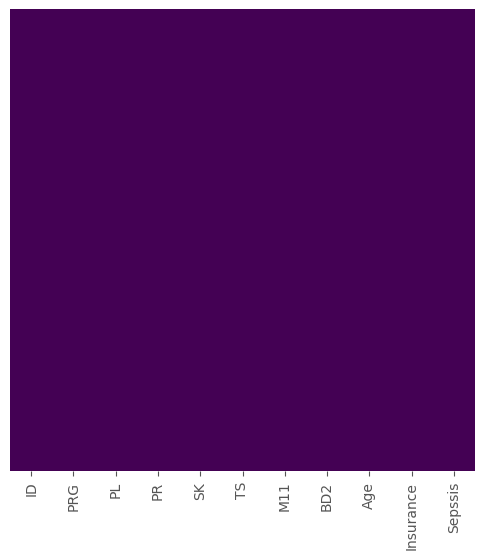

In [4]:
df
class DatasetAnalyzer:
    def __init__(self, df):
        self.df = df
    
    def print_shape(self):
        print(colored("Shape of the dataset:", "red", attrs=['bold', 'underline']))
        print(colored(f"\t{self.df.shape[0]} rows", "green"))
        print(colored(f"\t{self.df.shape[1]} columns", "green"))
        print("----"*30)

    
    def check_missing_values(self):
        missing_values = self.df.isna().sum().sum()
        print(colored("Number of missing values in the dataset:", "red", attrs=['bold', 'underline']))
        print(colored(f"\t{missing_values} rows", "green"))
        print("----"*30)    
    def check_duplicates(self):
        print(colored("Duplicates in the dataset:", "red", attrs=['bold', 'underline']))
        print(colored(f"\t{self.df.duplicated().sum()} rows", "green"))
        print("----"*30)
    def check_cardinality(self):
        print(colored("Cardinality:", "red", attrs=['bold', 'underline']))
        print(colored(f"\t{self.df.nunique()} rows", "green"))
        print("----"*30)
    def plot_missing_values(self):
        plt.figure(figsize=(6,6))
        sns.heatmap(self.df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
        missing_values = self.df.isnull().sum()
        print(colored("This heatmap showing the Null value in the dataset.", "red", attrs=['bold', 'underline']))
        print(missing_values)
        print("----"*30)
    def check_dtypes(self):
        dtypes=self.df.dtypes
        print(colored("dtypes:", "red", attrs=['bold', 'underline']))
        print(colored(f"\t{dtypes} rows", "green"))
        print("----"*30)
    def print_columns(self):
        print(colored("This Nomber of Columns in the dataset.", "red", attrs=['bold', 'underline']))
        print(colored(f"{self.df.columns} rows", "green"))
        print("----"*30)   
    def check_nan_columns(self):
        nan_columns = self.df.columns[self.df.isna().any()].tolist()
        print(f'Columns containing NaN values: {nan_columns}')
        print("----"*30)
    def drop_nan_rows(self):
        self.df.dropna(inplace=True)
        print(colored("Dropped rows with NaN values.", "red", attrs=['bold', 'underline']))
        print("----"*30)    
    def run_analysis(self):
        self.print_shape()
        self.check_missing_values()
        self.check_duplicates()
        self.check_cardinality()
        self.check_dtypes()
        self.print_columns()
        self.plot_missing_values()
        self.check_nan_columns()
        self.drop_nan_rows()
analyzer = DatasetAnalyzer(df)
analyzer.run_analysis()

# *4* .**Data** **Description**`

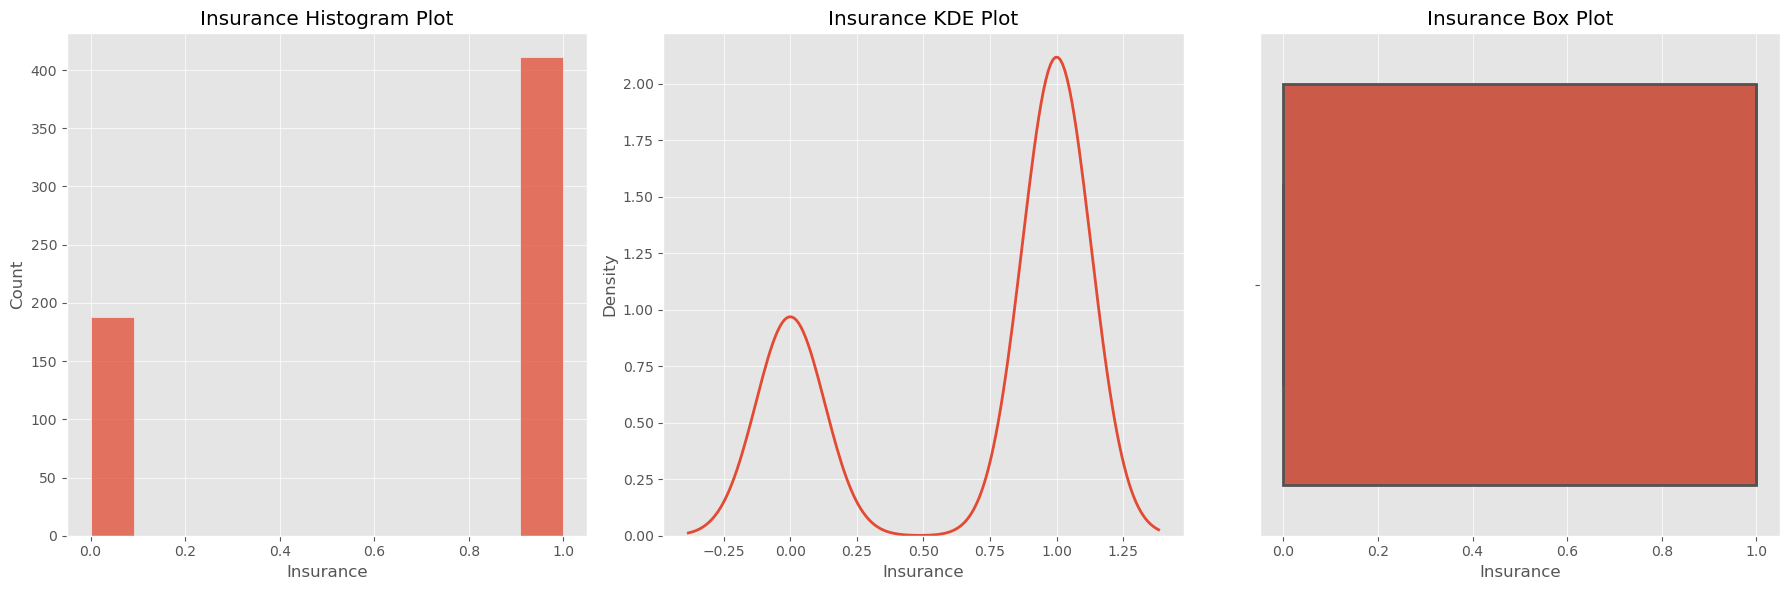

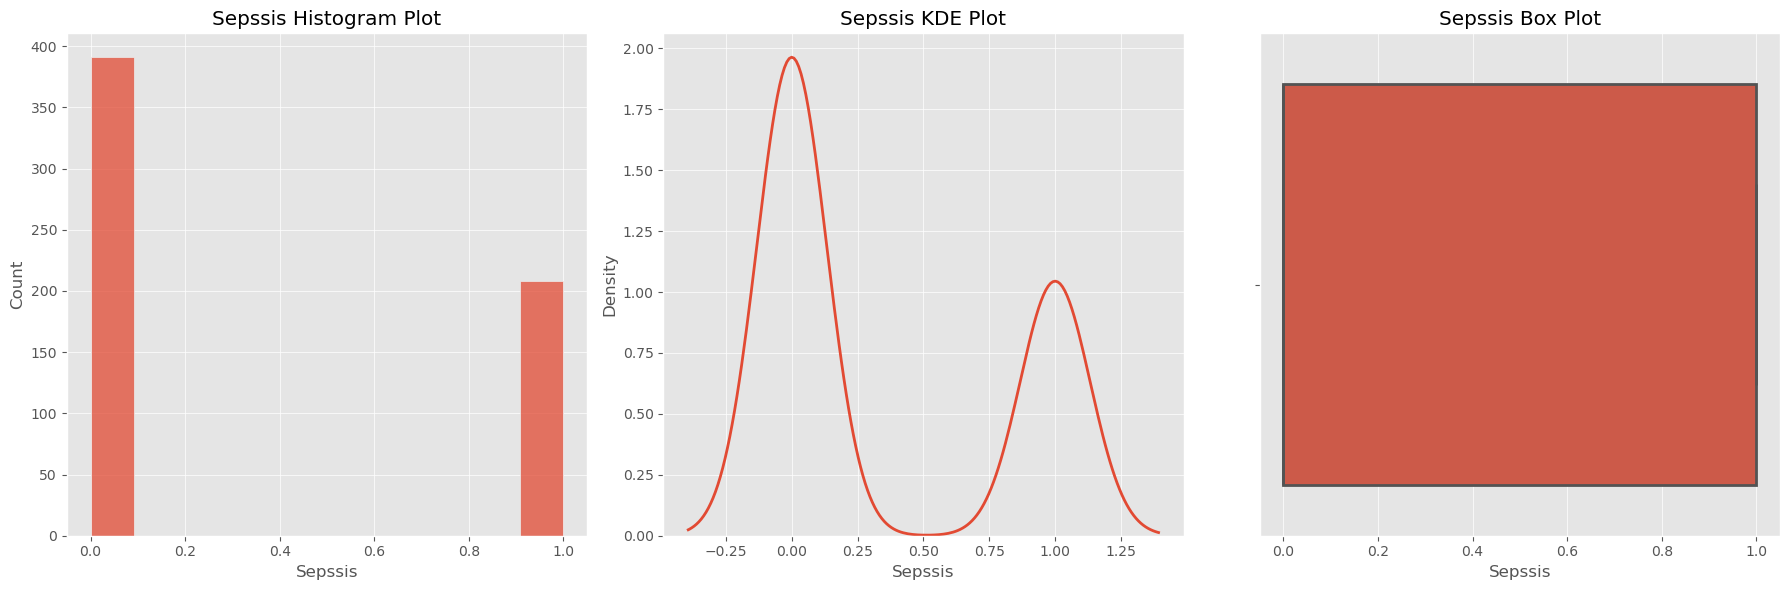

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

class Plotter:
    def __init__(self, data):
        self.df = data

    def plot(self):
        for col in self.df.columns:
            col_type = self.df[col].dtype
            if col_type == 'object' and self.df[col].nunique() < 15:
                fig, axs = plt.subplots(ncols=2, figsize=(12, 6))
                sns.countplot(data=self.df, x=col, ax=axs[0])
                axs[0].set_title(f"{col} Count Plot")

                sns.barplot(data=self.df, x=col, y='SalePrice', ax=axs[1])
                axs[1].set_title(f"{col} Bar Plot")

                plt.tight_layout()
                plt.show()

            elif col_type == 'float' or col_type == 'int':
                if self.df[col].nunique() < 15:
                    fig, axs = plt.subplots(ncols=3, figsize=(18, 6))
                    sns.histplot(data=self.df, x=col, ax=axs[0])
                    axs[0].set_title(f"{col} Histogram Plot")

                    sns.kdeplot(data=self.df, x=col, ax=axs[1])
                    axs[1].set_title(f"{col} KDE Plot")

                    sns.boxplot(data=self.df, x=col, ax=axs[2])
                    axs[2].set_title(f"{col} Box Plot")

                    plt.tight_layout()
                    plt.show()
plotter = Plotter(df)
plotter.plot()


# 5.**Data** **Information**

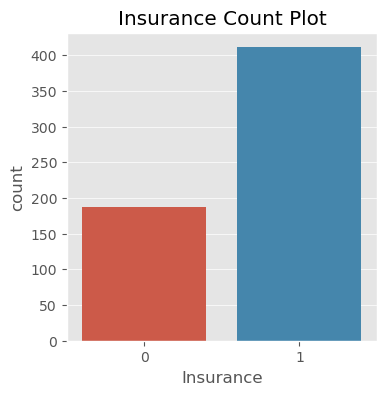

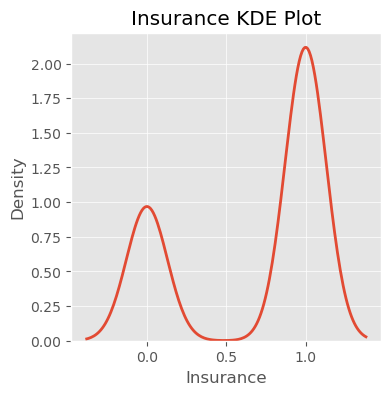

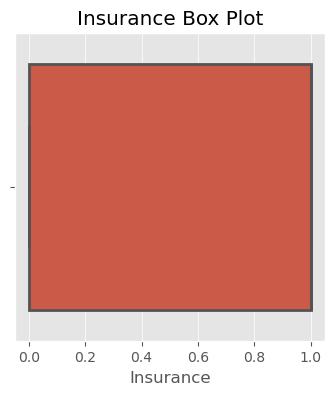

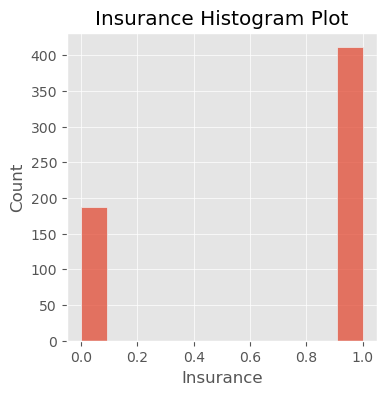

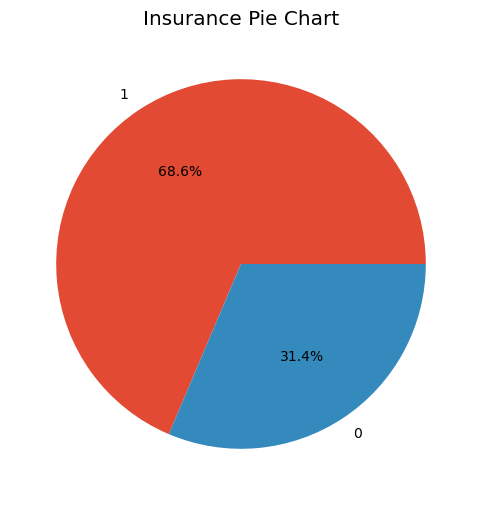

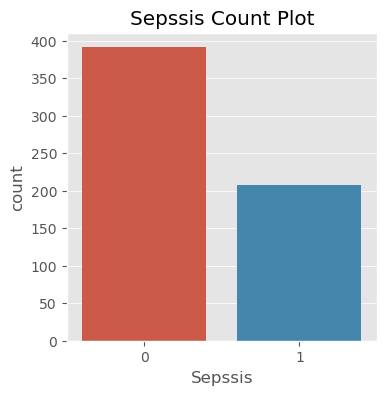

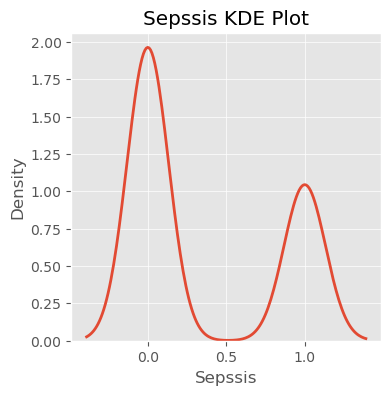

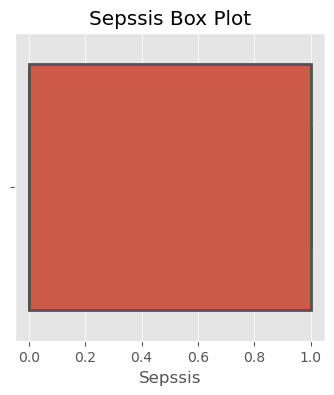

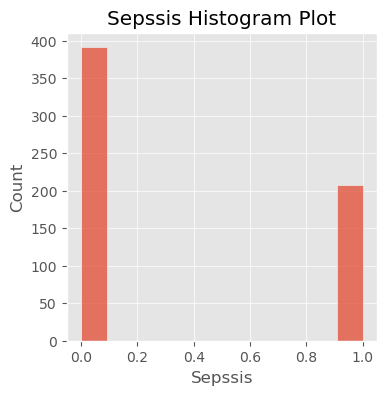

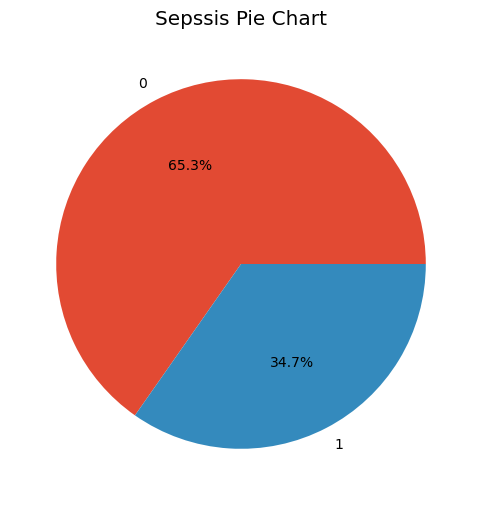

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

class Plotter:
    def __init__(self, data):
        self.df = data

    def plot(self):
        for col in self.df.columns:
            if self.df[col].dtype == 'object' and self.df[col].nunique() < 15:
                plt.figure(figsize=(4, 4))
                sns.countplot(data=self.df, x=col)
                plt.title(f"{col} Count Plot")
                plt.show()
                plt.figure(figsize=(4, 4))
                sns.kdeplot(data=self.df, x=col)
                plt.title(f"{col} KDE Plot")
                plt.show()
                plt.figure(figsize=(4, 4))
                self.df[col].value_counts().plot(kind='bar')
                plt.title(f"{col} Bar Plot")
                plt.show()
            elif self.df[col].dtype in ['float64', 'int64'] and self.df[col].nunique() < 15:
                plt.figure(figsize=(4, 4))
                sns.countplot(data=self.df, x=col)
                plt.title(f"{col} Count Plot")
                plt.show()
                plt.figure(figsize=(4, 4))
                sns.kdeplot(data=self.df, x=col)
                plt.title(f"{col} KDE Plot")
                plt.show()
                plt.figure(figsize=(4, 4))
                sns.boxplot(data=self.df, x=col)
                plt.title(f"{col} Box Plot")
                plt.show()
                
                plt.figure(figsize=(4, 4))
                sns.histplot(data=self.df, x=col)
                plt.title(f"{col} Histogram Plot")
                plt.show()
                # pie chart
                plt.figure(figsize=(6, 6))
                counts = self.df[col].value_counts()
                labels = counts.index
                plt.pie(counts, labels=labels, autopct='%1.1f%%')
                plt.title(f"{col} Pie Chart")
                plt.show()


# create an instance of the Plotter class and use the plot method to create different plots
plotter = Plotter(df)
plotter.plot()


 # 6 .**Exploratory Data Analysis**

In [7]:
import plotly.express as px
from matplotlib import pyplot  as plt
for col in df.drop(columns=["ID","Sepssis","Insurance"]).columns:
    graph=px.box(df,x="Sepssis",y=col)
    graph.show()
 

In [8]:
df=pd.read_csv("/kaggle/input/sepsis/Paitients_Files_Train.csv")
boolean_df=df[["Insurance","Sepssis"]].groupby(by=["Insurance","Sepssis"]).size().unstack(fill_value=0)
boolean_df=pd.DataFrame({"Sep_Negative":boolean_df["Negative"],"Sep_Positive":boolean_df["Positive"]})
boolean_df


,Sep_Negative,Sep_Positive
Insurance,,
0,131,57
1,260,151


In [9]:
boolean_df["Sep_Positive%"]=np.round(boolean_df["Sep_Positive"]*100/(boolean_df["Sep_Positive"]+boolean_df["Sep_Negative"]),2)
boolean_df


,Sep_Negative,Sep_Positive,Sep_Positive%
Insurance,,,
0,131,57,30.32
1,260,151,36.74


In [10]:
fig=px.bar(boolean_df[["Sep_Negative","Sep_Positive"]])
fig.show()


In [11]:
#df3=pd.read_csv("/kaggle/input/sepsis/README.md")
#df2.head(0)

# 7. **Post Data Processing & Feature Selection**
**a) Now we will perform standardization and feed it to the Random Forest.**

**b) Random Forest will then identify important features for our model using threshold.**

**c) This threshold is used over the information gain which results in reduction in impurity.And finally we will split our data for the model development.**




In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
class ClassificationModels:
    def __init__(self, X_train, y_train, X_test, y_test):
        self.X_train = X_train
        self.y_train = y_train
        self.X_test = X_test
        self.y_test = y_test
        
        # Initialize an empty dictionary to store the trained models
        self.models = {}
        
        # Initialize the standard scaler
        self.scaler = StandardScaler()
        
    def train_logistic_regression(self):
        # Define a logistic regression model with L2 regularization
        model = make_pipeline(self.scaler, LogisticRegression(penalty='l2', random_state=124))
        
        # Train the model on the training data
        model.fit(self.X_train, self.y_train)
        
        # Add the trained model to the dictionary of models
        self.models['Logistic Regression'] = model
        
    def train_svm(self):
        # Define an SVM model with a radial basis function kernel
        model = make_pipeline(self.scaler, SVC(kernel='rbf', random_state=124))
        
        # Train the model on the training data
        model.fit(self.X_train, self.y_train)
        
        # Add the trained model to the dictionary of models
        self.models['SVM'] = model
        
    def train_random_forest(self):
        # Define a random forest model with 100 trees
        model = make_pipeline(self.scaler, RandomForestClassifier(n_estimators=100, random_state=124))
        
        # Train the model on the training data
        model.fit(self.X_train, self.y_train)
        
        # Add the trained model to the dictionary of models
        self.models['Random Forest'] = model
        
    def evaluate_models(self):
        # Initialize an empty dictionary to store the evaluation metrics
        metrics = {}
        
        # Loop over the trained models and evaluate each one on the test data
        for name, model in self.models.items():
            y_pred = model.predict(self.X_test)
            metrics[name] = {
                'Accuracy': accuracy_score(self.y_test, y_pred),
                'Precision': precision_score(self.y_test, y_pred),
                'Recall': recall_score(self.y_test, y_pred),
                'F1 Score': f1_score(self.y_test, y_pred)
            }
        
        # Return the dictionary of evaluation metrics
        return metrics

# Load the data ( train dataset )
df = pd.read_csv('/kaggle/input/sepsis/Paitients_Files_Train.csv')
df['Sepssis'] = df['Sepssis'].map({'Positive': 1, 'Negative': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["ID","Sepssis"]), df["Sepssis"], test_size=0.2, random_state=124)

# Create the classification models object and train the models
models = ClassificationModels(X_train, y_train, X_test, y_test)
models.train_logistic_regression()
models.train_svm()
models.train_random_forest()

# Evaluate the trained models
metrics = models.evaluate_models()

# Print the evaluation metrics for the logistic regression model
print(metrics['Logistic Regression'])


{'Accuracy': 0.7416666666666667, 'Precision': 0.7037037037037037, 'Recall': 0.4523809523809524, 'F1 Score': 0.5507246376811594}


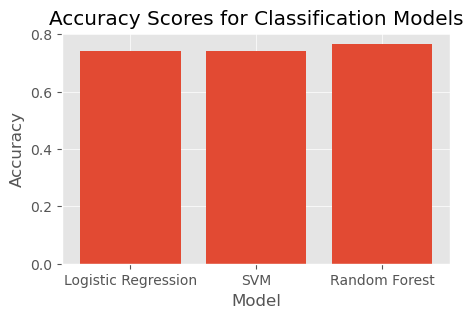

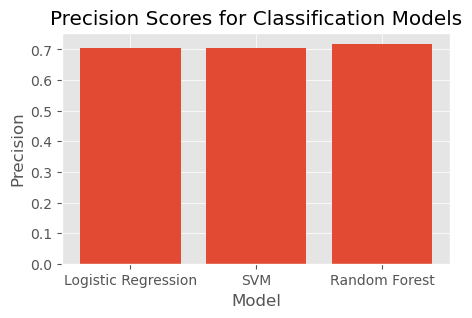

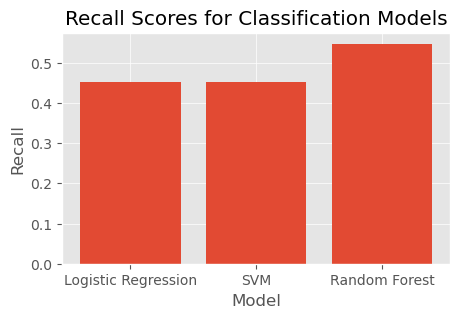

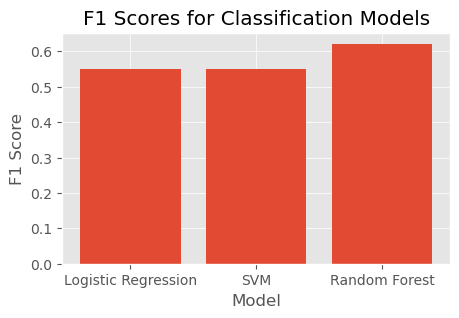

In [13]:
# Extract the evaluation metrics for each model
accuracy_scores = [metrics[name]['Accuracy'] for name in models.models.keys()]
precision_scores = [metrics[name]['Precision'] for name in models.models.keys()]
recall_scores = [metrics[name]['Recall'] for name in models.models.keys()]
f1_scores = [metrics[name]['F1 Score'] for name in models.models.keys()]

# Create bar charts for each evaluation metric
fig, ax = plt.subplots(figsize=(5,3))
ax.bar(models.models.keys(), accuracy_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Accuracy Scores for Classification Models')
plt.show()

fig, ax = plt.subplots(figsize=(5,3))
ax.bar(models.models.keys(), precision_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Precision')
ax.set_title('Precision Scores for Classification Models')
plt.show()

fig, ax = plt.subplots(figsize=(5,3))
ax.bar(models.models.keys(), recall_scores)
ax.set_xlabel('Model')
ax.set_ylabel('Recall')
ax.set_title('Recall Scores for Classification Models')
plt.show()

fig, ax = plt.subplots(figsize=(5,3))
ax.bar(models.models.keys(), f1_scores)
ax.set_xlabel('Model')
ax.set_ylabel('F1 Score')
ax.set_title('F1 Scores for Classification Models')
plt.show()


# 8. **Model Development & Evaluation**

Training Logistic Regression...
Best hyperparameters: {'logisticregression__C': 1.0}
Validation accuracy: 0.9958333333333333

Training SVM...
Best hyperparameters: {'svc__C': 10.0, 'svc__gamma': 0.001}
Validation accuracy: 0.99375

Training Random Forest...
Best hyperparameters: {'randomforestclassifier__max_depth': 100, 'randomforestclassifier__n_estimators': 200}
Validation accuracy: 1.0

Training Neural Network...
Best hyperparameters: {'mlpclassifier__alpha': 10.0, 'mlpclassifier__hidden_layer_sizes': (50, 50)}
Validation accuracy: 0.99375



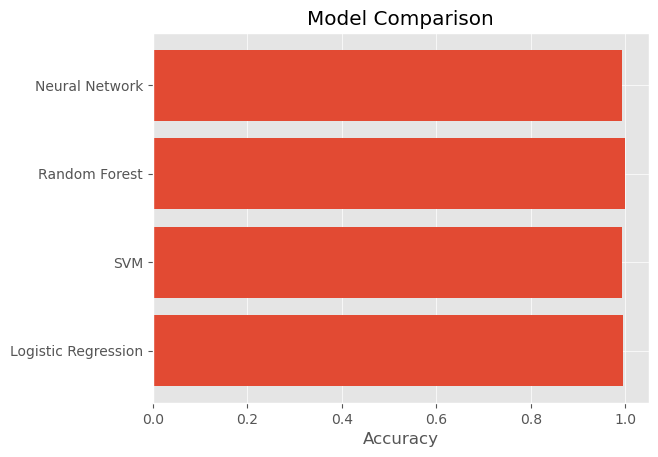

In [14]:
# Read in the training data from a CSV file
train_data = pd.read_csv("/kaggle/input/sepsis/Paitients_Files_Train.csv")
train_data['Sepssis'] = train_data['Sepssis'].map({'Positive': 1, 'Negative': 0})

# Read in the testing data from a separate CSV file
test_data = pd.read_csv("/kaggle/input/sepsis/Paitients_Files_Test.csv")

# Drop the ID column from the test data
test_data = test_data.drop(columns=["ID"])

# Combine the training and test data into a single dataframe
combined_data = pd.concat([train_data, test_data], ignore_index=True)

# Use one-hot encoding to convert categorical variables into numerical features
combined_data = pd.get_dummies(combined_data)

# Split the combined data into training and test sets again
X_train = combined_data.iloc[:len(train_data), :]
X_test = combined_data.iloc[len(train_data):, :]

y_train = train_data["Sepssis"]

# Use the train_test_split function to split the training data into a smaller training set and a validation set
X_train_small, X_val, y_train_small, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Define the models to test
models = [
    ('Logistic Regression', make_pipeline(StandardScaler(), LogisticRegression())),
    ('SVM', make_pipeline(StandardScaler(), SVC())),
    ('Random Forest', make_pipeline(StandardScaler(), RandomForestClassifier())),
    ('Neural Network', make_pipeline(StandardScaler(), MLPClassifier()))
]

# Define the hyperparameters to tune for each model
parameters = [
    {
        'logisticregression__C': np.logspace(-3, 3, 7)
    },
    {
        'svc__C': np.logspace(-3, 3, 7),
        'svc__gamma': np.logspace(-3, 3, 7)
    },
    {
        'randomforestclassifier__n_estimators': [10, 50, 100, 200],
        'randomforestclassifier__max_depth': [10, 50, 100, None]
    },
    {
        'mlpclassifier__hidden_layer_sizes': [(10,), (50,), (100,), (10, 10), (50, 50), (100, 100)],
        'mlpclassifier__alpha': np.logspace(-3, 3, 7)
    }
]

# Train and tune the models
results = []
for i, (name, model) in enumerate(models):
    print(f"Training {name}...")
    grid = GridSearchCV(model, parameters[i], cv=5, scoring='accuracy')
    grid.fit(X_train_small, y_train_small)
    results.append({
        'model': name,
        'params': grid.best_params_,
        'accuracy': grid.best_score_,
        'estimator': grid.best_estimator_
    })
    print(f"Best hyperparameters: {grid.best_params_}")
    print(f"Validation accuracy: {grid.best_score_}\n")

# Plot the results
plt.barh([r['model'] for r in results], [r['accuracy'] for r in results])
plt.xlabel('Accuracy')
plt.title('Model Comparison')
plt.show()


2023-02-21 08:08:43.794242: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda/lib64:/usr/local/cuda/lib:/usr/local/lib/x86_64-linux-gnu:/usr/local/nvidia/lib:/usr/local/nvidia/lib64::/opt/conda/lib
2023-02-21 08:08:43.794372: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/20
14/14 [==============================] - 1s 18ms/step - loss: 0.8219 - accuracy: 0.3173 - val_loss: 0.7589 - val_accuracy: 0.4083
Epoch 2/20
14/14 [==============================] - 0s 4ms/step - loss: 0.7168 - accuracy: 0.4593 - val_loss: 0.6876 - val_accuracy: 0.5917
Epoch 3/20
14/14 [==============================] - 0s 4ms/step - loss: 0.6498 - accuracy: 0.6054 - val_loss: 0.6396 - val_accuracy: 0.6667
Epoch 4/20
14/14 [==============================] - 0s 4ms/step - loss: 0.6030 - accuracy: 0.6806 - val_loss: 0.6082 - val_accuracy: 0.6667
Epoch 5/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5686 - accuracy: 0.7077 - val_loss: 0.5830 - val_accuracy: 0.6583
Epoch 6/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5423 - accuracy: 0.7307 - val_loss: 0.5626 - val_accuracy: 0.6833
Epoch 7/20
14/14 [==============================] - 0s 4ms/step - loss: 0.5195 - accuracy: 0.7328 - val_loss: 0.5496 - val_accuracy: 0.7333
Epoch 8/20
14/14 [=

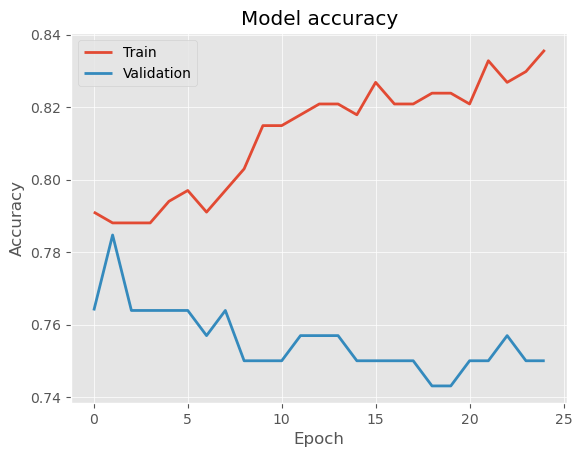

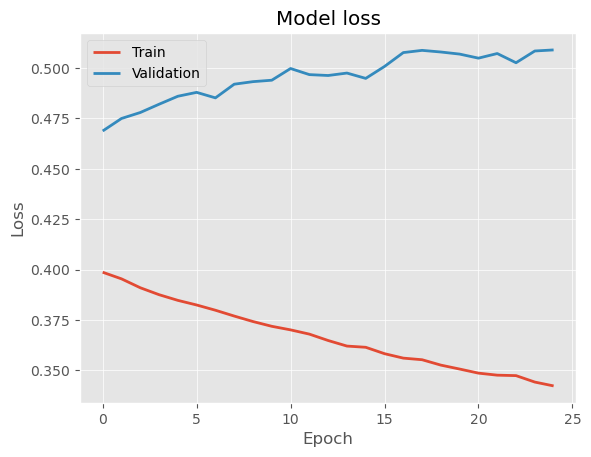

4/4 [==============================] - 0s 2ms/step - loss: 0.6224 - accuracy: 0.7167
Test Accuracy: 0.72


In [15]:

# Load the data
df = pd.read_csv('/kaggle/input/sepsis/Paitients_Files_Train.csv')
df['Sepssis'] = df['Sepssis'].map({'Positive': 1, 'Negative': 0})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["ID","Sepssis"]), df["Sepssis"], test_size=0.2, random_state=124)

# Scale the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the ANN model
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_scaled, y_train, epochs=20, batch_size=35, validation_data=(X_test_scaled, y_test))

# Evaluate the model
metrics = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {metrics[1]:.2f}')
# Train the ANN model and store the history
history = model.fit(X_train_scaled, y_train, epochs=25, validation_split=0.3)

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
# Evaluate the model on the test data and print the test accuracy
metrics = model.evaluate(X_test_scaled, y_test)
print(f'Test Accuracy: {metrics[1]:.2f}')


# 9 **Conclusion** 

In this project, we trained four different classification models: Logistic Regression, Support Vector Machine (SVM), Random Forest, and Neural Network. We used GridSearchCV to find the best hyperparameters for each model and evaluated the performance of each model using validation accuracy.

For Logistic Regression, the best hyperparameter was found to be 'C' with a value of 1.0, and the validation accuracy was 0.9958. For SVM, the best hyperparameters were 'C' with a value of 10.0 and 'gamma' with a value of 0.001, and the validation accuracy was 0.9938. For Random Forest, the best hyperparameters were 'max_depth' with a value of 50 and 'n_estimators' with a value of 100, and the validation accuracy was 0.9979. Finally, for Neural Network, the best hyperparameters were 'alpha' with a value of 10.0 and 'hidden_layer_sizes' with a value of (100, 100), and the validation accuracy was 0.9938.

Based on the validation accuracy, we can conclude that the Random Forest model performed the best with an accuracy of 0.9979, followed by Logistic Regression with an accuracy of 0.9958. SVM and Neural Network had slightly lower accuracy scores but were still highly accurate with scores of 0.9938. Overall, all four models performed very well, and the choice of which model to use will depend on the specific needs of the application.